In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
car_data = pd.read_csv(r"C:\Users\hp\OneDrive\Data Science\Practical\Machine Learning\Dataset\car-mpg.csv")
car_data

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [47]:
car_data.shape

(398, 10)

In [48]:
car_data=car_data.drop(['car_name'],axis=1)

In [49]:
#Strating Basic EDA

In [50]:
#Now check the null values in our df

In [51]:
car_data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [52]:
#check any column contain ? mark

In [53]:
car_data.isin(['?']).any()

mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
car_type    False
dtype: bool

In [54]:
#we find hp column contain ? mark
#now we replace the question mark with nan values then replace NAN velues with median
car_data=car_data.replace('?',np.nan)

In [55]:
car_data.isin(['?']).any()

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car_type    False
dtype: bool

In [56]:
#NO ? mark now , but there is NAN velues that need to fill

In [57]:
car_data['hp'].fillna(car_data['hp'].median(),inplace=True)

In [58]:
#check again nan value

In [59]:
car_data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [60]:
#now no null value and ? mark in dataframe
#But there is anouther column name "origin" which is catagorical column but
#this column we converted to individual column by get_dummies()
#For this first we create dictionary

In [61]:
car_data

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [62]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [63]:
car_data['origin']=car_data['origin'].replace({1:'america',2:'europe',3:'asia'})
car_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


In [64]:
car_data=pd.get_dummies(car_data,columns=['origin'])

In [65]:
car_data

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [67]:
car_data.shape

(398, 11)

# 2. Model building

In [74]:
x=car_data.drop(['mpg'],axis=1)
y=car_data[['mpg']]

In [75]:
x

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,8,307.0,130,3504,12.0,70,0,1,0,0
1,8,350.0,165,3693,11.5,70,0,1,0,0
2,8,318.0,150,3436,11.0,70,0,1,0,0
3,8,304.0,150,3433,12.0,70,0,1,0,0
4,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,1,0,0
394,4,97.0,52,2130,24.6,82,1,0,0,1
395,4,135.0,84,2295,11.6,82,1,1,0,0
396,4,120.0,79,2625,18.6,82,1,1,0,0


In [76]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
#Now we scalize the independent and dependent variable

In [79]:
scaler = StandardScaler()

In [80]:
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)
x_std

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [81]:
y_std=scaler.fit_transform(y)
y_std=pd.DataFrame(y_std,columns=y.columns)

In [82]:
y_std

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [ ]:
#now we split the both variable for training data and test data
# for this we import test_train_split() from skleran_model_selection

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_std,y_std,test_size=0.30,random_state=1)
x_train.shape

(278, 10)

# 2.a Simple Linear Model

In [88]:
from sklearn.linear_model import LinearRegression
# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Print the coefficients for each independent variable
#coefficients for each independent variable are printed using a for loop 

In [100]:
for col_name, coef in zip(x_train.columns, regressor.coef_[0]):
     print(f"The coefficient for {col_name} is {coef}")
# Print the intercept
#The intercept is stored in the intercept variable and printed using an f-st
intercept = regressor.intercept_[0]
print(f"The intercept is {intercept}")

The coefficient for cyl is 0.3210223856916104
The coefficient for disp is 0.32483430918483874
The coefficient for hp is -0.2291695005943761
The coefficient for wt is -0.7112101905072294
The coefficient for acc is 0.014713682764191154
The coefficient for yr is 0.3755811949510746
The coefficient for car_type is 0.38147694842331026
The coefficient for origin_america is -0.07472247547584204
The coefficient for origin_asia is 0.04451525203567791
The coefficient for origin_europe is 0.048348549539453965
The intercept is 0.019284116103639733


# 2.b Regularized Ridge Regression

In [ ]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

In [101]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=0.3)
ridge_model.fit(x_train,y_train)

print("Ridge model coef: {}".format(ridge_model.coef_))

Ridge model coef: [[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]


In [ ]:
#As the data has 10 columns hence 10 coefficients appear here    
#Insight:we find that coefficient is changed

# 2.c Regularized Lasso Regression

In [103]:
from sklearn.linear_model import Lasso
Lasso_model = Lasso(alpha = 0.1)
Lasso_model.fit(x_train, y_train)
print('Lasso model coef: {}'.format(Lasso_model.coef_))

Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


In [ ]:
# now compare the model with R square value
#The score() method returns the R-squared value,

# 3. Score Comparison

In [ ]:
#Model score - r^2 or coeff of determinant
#r^2 = 1-(RSS/TSS) = Regression error/TSS 

In [107]:
#Simple Linear Model
print(regressor.score(x_train, y_train))
print(regressor.score(x_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(x_train, y_train))
print(ridge_model.score(x_test, y_test))

print('*************************')
#Lasso
print(Lasso_model.score(x_train, y_train))
print(Lasso_model.score(x_test, y_test))

0.8343770256960538
0.8513421387780066
*************************
0.8343617931312617
0.8518882171608505
*************************
0.7938010766228453
0.8375229615977084


In [ ]:
#Insight:Both Ridge & Lasso regularization performs very well on this data,

# 4. Model Parameter Tuning

In [109]:
data_train_test = pd.concat([x_train,y_train],axis=1)

In [110]:
data_train_test

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035
...,...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968,0.446497
255,-0.856321,-0.513026,-0.427091,-0.296088,-0.061030,0.538847,0.941412,0.773559,-0.497643,-0.461968,0.203100
72,1.498191,1.061796,1.197027,1.089620,-1.113959,-1.085858,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
235,-0.856321,-0.925936,-0.767632,-0.834055,0.955591,0.268063,0.941412,-1.292726,2.009471,-0.461968,0.318393


In [116]:
import statsmodels.api as sm
# Prepare the data
x = x_train[['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type', 'origin_america','origin_europe','origin_asia']]
y = y_train['mpg']
# Add constant term to the independent variables
x = sm.add_constant(x)
# Fit the OLS model
ols_model = sm.OLS(y, x).fit()
# Get the parameter estimates
params = ols_model.params
params

const             0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_europe     0.048349
origin_asia       0.044515
dtype: float64

In [117]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           3.12e-99
Time:                        18:24:46   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0193      0.025      0.765      0.445      -0.030       0.069
cyl                0.3210      0.112      2.856      0.005       0.100       0.542
disp               0.3248      0.128      2.544      0.012       0.073       0.576
hp                -0.2292      0.079     -2.915      0.004      -0.384      -0.074
wt                -0.7112      0.088     -8.118      0.000      -0.884      -0.539
acc                0.0147      0.039      0.373      0.709      -0.063       0.092
yr                 0.3756      0.029     13.088      0.000       0.319       0.432
car_type           0.3815      0.067      5.728      0.000       0.250       0.513
origin_america    -0.0747      0.020     -3.723      0.000      -0.114      -0.035
origin_europe      0.0483      0.021      2.270      0.024       0.006       0.090
origin_asia        0.0445      0.020      2.175      0.031       0.004       0.085
==============================================================================
Omnibus:                       22.678   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.139
Skew:                           0.513   Prob(JB):                     1.42e-08
Kurtosis:                       4.438   Cond. No.                     5.85e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.56e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [120]:
# calculate MSE from predicted Y and actual Y_test
Y_pred=regressor.predict(x_test)
Y_pred

array([[-0.53114626],
       [ 0.58000872],
       [-0.28618227],
       [ 0.60691934],
       [-0.10856958],
       [-0.83656974],
       [ 0.86612394],
       [ 1.48617281],
       [-0.60033432],
       [-1.58118512],
       [ 0.92691618],
       [-0.63101009],
       [-0.44775729],
       [ 0.41988537],
       [ 1.7249204 ],
       [ 0.00749374],
       [-1.62842071],
       [-0.62516288],
       [-1.82909016],
       [ 1.28766047],
       [ 0.34158378],
       [ 1.10119855],
       [-0.53530813],
       [ 0.25579947],
       [ 0.35735718],
       [ 0.91281065],
       [ 1.21245717],
       [ 1.27266567],
       [-0.92362957],
       [ 0.88592768],
       [ 0.1768598 ],
       [-1.69878378],
       [-0.23657394],
       [ 0.67791148],
       [ 0.26351164],
       [-1.21298076],
       [ 0.46743506],
       [-1.91190633],
       [ 1.09681632],
       [ 0.17397673],
       [ 0.15780247],
       [ 0.20951487],
       [-0.1588762 ],
       [ 1.3451445 ],
       [ 0.00410714],
       [-0

In [122]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((Y_pred - y_test) ** 2)
mse

C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


mpg    0.142634
dtype: float64

In [123]:
# calculate Rooot Mean square error
import math
rmse = math.sqrt(mse)
rmse

0.3776693425408784

In [ ]:
#So there is an avg. mpg difference of 0.37 from real mpg

In [ ]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.


In [ ]:
#Lets check the residuals for some of these predictor.

<Axes: xlabel='yr', ylabel='mpg'>

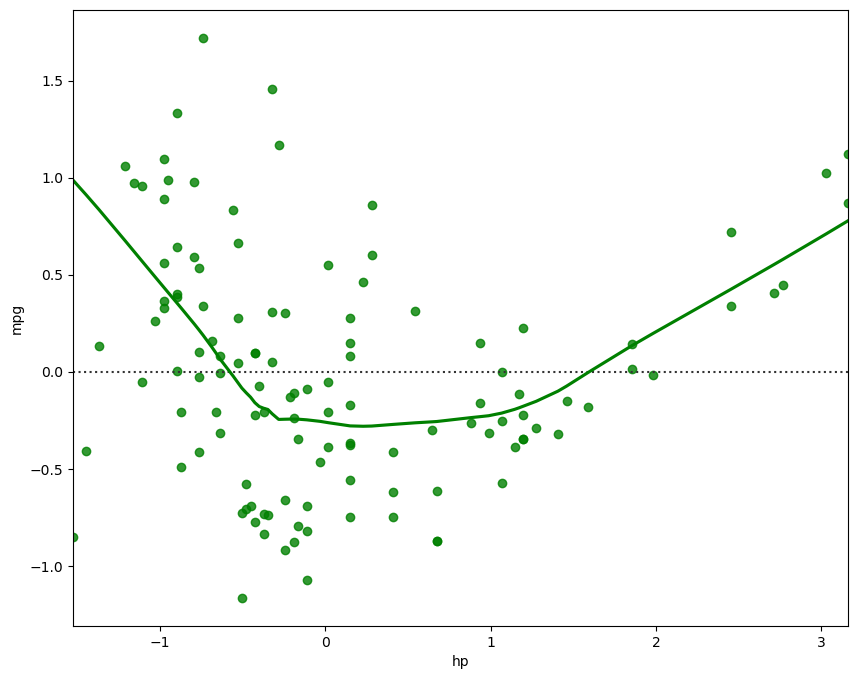

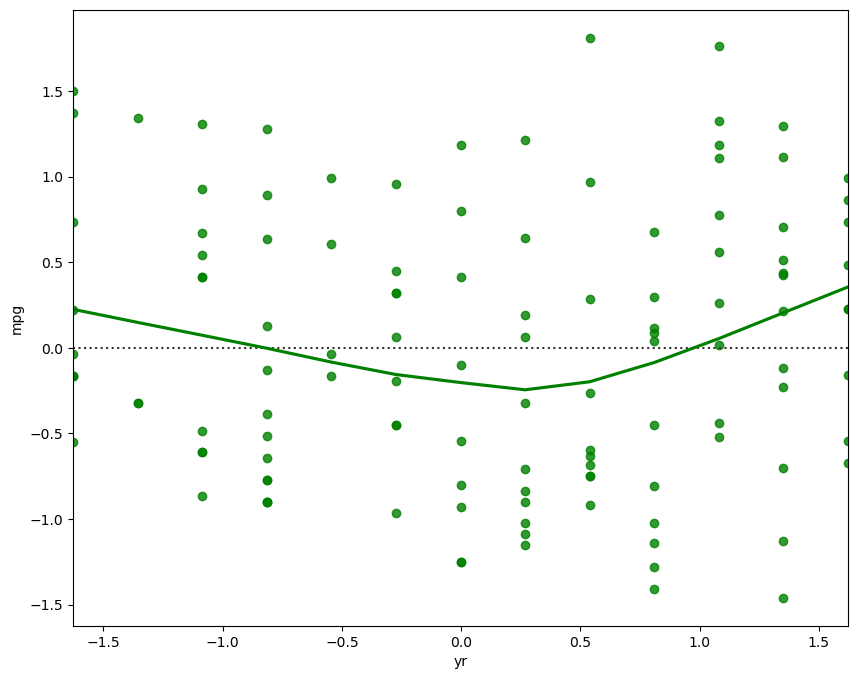

In [126]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['yr'], y= y_test['mpg'], color='green', lowess=True )

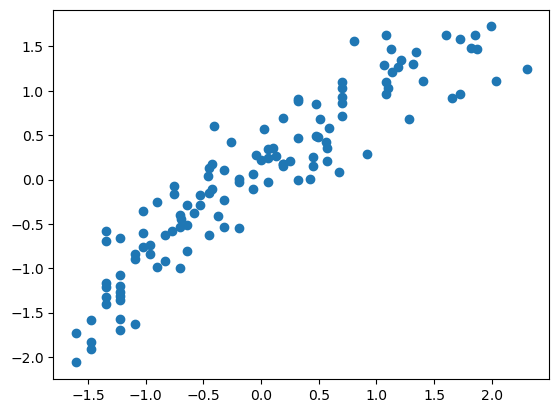

In [127]:
plt.scatter(y_test['mpg'], Y_pred)

In [ ]:
#Insight:corelation between predicted and actual mpg is positive

In [ ]:
# A good model's prediction will be close to actual leading to high R and R2 values

# 5. Inference
Both Ridge & Lasso regularization performs very well on this data, though Ridge gives a better score. The above scatter plot depicts the correlation between the actual and predicted mpg values.